### Gyrosynchrotron Emission from Radio-Loud Ultracool Dwarfs and Incident Proton Flux on Habitable Zone Planets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import seaborn as sns
from scipy.optimize import curve_fit

### Loading the data

The function `load_data(filename)` loads flux values for three ultracool dwarf stars (UCDs) from a `.txt` file and converts them into NumPy arrays. The data is structured in the file with comments denoting different UCD sources: `NLTT 33370`, `LP 349-25 AB`, and `LSR J1835+3259` and their associated data.
The function reads the file line by line, identifies the current source based on comments, and appends the data values from each line to a list corresponding to the current source. After processing the file, the function converts the lists to NumPy arrays and returns a dictionary containing the data arrays for each source.
The code specifies a filename and loads the data using the `load_data()` function. The arrays for each source can then be accessed through the returned dictionary.

In [2]:
def load_data(filename):
    # Initialize dictionaries to hold the data arrays
    data_dict = {
        'NLTT 33370': [],
        'LP 349-25 AB': [],
        'LSR J1835+3259': []
    }
    
    # Keep track of the current source name
    current_source = None
    
    with open(filename, 'r') as file:
        for line in file:
            # Strip any leading or trailing whitespace from the line
            line = line.strip()
            
            # Check if the line starts with a source name comment
            if line.startswith('#'):
                # Determine the current source based on the comment
                if 'NLTT 33370' in line:
                    current_source = 'NLTT 33370'
                elif 'LP 349-25 AB' in line:
                    current_source = 'LP 349-25 AB'
                elif 'LSR J1835+3259' in line:
                    current_source = 'LSR J1835+3259'
            else:
                # If the line contains data, add it to the current source's list
                if current_source:
                    # Split the line by commas and convert to float
                    data_values = list(map(float, line.split(',')))
                    data_dict[current_source].append(data_values)
    
    # Convert the lists to NumPy arrays
    for source in data_dict:
        data_dict[source] = np.array(data_dict[source])
    
    return data_dict

# Specify the filename of the text file
filename = 'stellar_flux.txt'

# Load the data
data = load_data(filename)

# Access the arrays for each source
nltt_33370_array = data['NLTT 33370']
lp_349_25_ab_array = data['LP 349-25 AB']
lsr_j1835_3259_array = data['LSR J1835+3259']

### Fitting the Spectral Indices

The measurements at different frequencies help estimate a spectral index $\alpha$ for flux density $F_\nu$ as $F_\nu \propto \nu^\alpha$. The spectral index values are found using the scipy function curve_fit with the $F_\nu$ relationship.

For LSR J1835-46546 and LP 349-25, the spectral indices are $\alpha = -0.76 \pm 0.07$ and $\alpha = -0.52 \pm 0.06$ respectively, consistent with optically thin gyrosynchrotron radiation. NLTT 33370 has a spectral index of $\alpha = -0.29 \pm 0.04$, which is slightly more shallow than expected for gyrosynchrotron or synchrotron radiation.

In [3]:
def spectral_index(x, c, a):
    return c*(x**a)

nltt_popt, nltt_pcov = curve_fit(spectral_index, nltt_33370_array[:,0], nltt_33370_array[:,1], sigma = nltt_33370_array[:,2])
lsr_popt, lsr_pcov = curve_fit(spectral_index, lsr_j1835_3259_array[:,0], lsr_j1835_3259_array[:,1], sigma = lsr_j1835_3259_array[:,2])
lp_popt, lp_pcov = curve_fit(spectral_index, lp_349_25_ab_array[:,0], lp_349_25_ab_array[:,1], sigma = lp_349_25_ab_array[:,2])

nltt_alpha, lsr_alpha, lp_alpha = nltt_popt[1], lsr_popt[1], lp_popt[1]

/tmp/ipykernel_15876/3249340272.py:5: OptimizeWarning: Covariance of the parameters could not be estimated
  lsr_popt, lsr_pcov = curve_fit(spectral_index, lsr_j1835_3259_array[:,0], lsr_j1835_3259_array[:,1], sigma = lsr_j1835_3259_array[:,2])


### Visualising the UCD Emission and fitted curves

/tmp/ipykernel_15876/3249340272.py:2: RuntimeWarning: divide by zero encountered in power
  return c*(x**a)


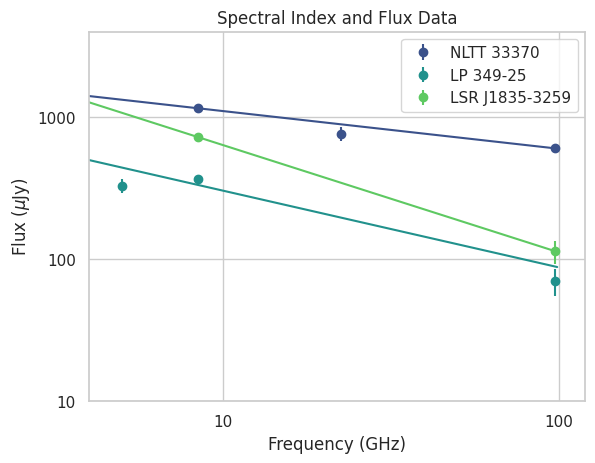

In [4]:
# Set the style and color palette from Seaborn
sns.set(style="whitegrid")
palette = sns.color_palette("viridis", n_colors=3)

# Plot data for NLTT 33370
plt.errorbar(nltt_33370_array[:, 0], nltt_33370_array[:, 1], yerr=nltt_33370_array[:, 2], fmt='o', label='NLTT 33370', color=palette[0])

# Plot data for LP 349-25
plt.errorbar(lp_349_25_ab_array[:, 0], lp_349_25_ab_array[:, 1], yerr=lp_349_25_ab_array[:, 2], fmt='o', label='LP 349-25', color=palette[1])

# Plot data for LSR J1835-3259
plt.errorbar(lsr_j1835_3259_array[:, 0], lsr_j1835_3259_array[:, 1], yerr=lsr_j1835_3259_array[:, 2], fmt='o', label='LSR J1835-3259', color=palette[2])

# Create x-values for spectral index curves
x_values = np.arange(0, 100, 1)

# Calculate spectral index curves
lp_spectral_index = spectral_index(x_values, lp_popt[0], lp_popt[1])
lsr_spectral_index = spectral_index(x_values, lsr_popt[0], lsr_popt[1])
nltt_spectral_index = spectral_index(x_values, nltt_popt[0], nltt_popt[1])

# Plot spectral index curves
plt.plot(x_values, lp_spectral_index, color=palette[1])
plt.plot(x_values, lsr_spectral_index, color=palette[2])
plt.plot(x_values, nltt_spectral_index, color=palette[0])

# Set y-axis and x-axis scales to logarithmic
plt.yscale('log')
plt.xscale('log')

# Setting the x-lim
plt.xlim([1, 105])

# Set axis tick format to display normal numbers instead of scientific notation
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, pos: f"{x:.0f}"))
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, pos: f"{y:.0f}"))

# Set labels and legend
plt.xlabel('Frequency (GHz)')
plt.ylabel('Flux ($\mu$Jy)')
plt.legend()
plt.title('Spectral Index and Flux Data')

plt.ylim([10, 4000])
plt.xlim([4, 120])

# Show the plot
plt.show()

### Jupiter and Saturn Aurorae

The kilometric radiation profiles of Jupiter and Saturn adapted from 1988 measurements, and scaled to the frequency and peak flux of UCD radio emission. Both profiles are again fit using curve_fit in order to provide more complete data for the plot. The inclusion of Jupiter and Saturn's auroral emission is to demonstrate the stark difference between planetary auroral emission and UCD gyrosynchrotron emission.

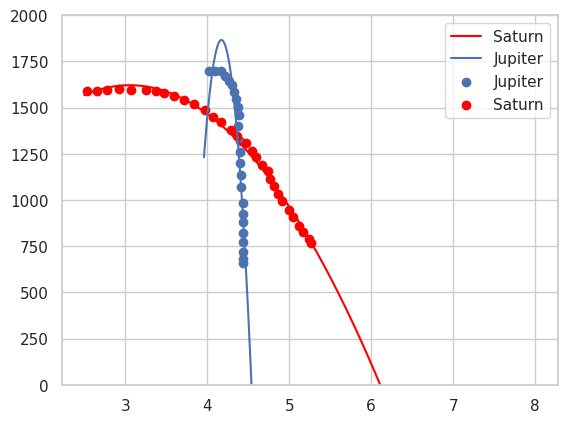

In [5]:
jupiter_aurora = pd.read_csv("Jupiter_aurora.csv", header=None, names=["Frequency (kHz)", "Flux Density"])
saturn_aurora = pd.read_csv("Saturn_aurora.csv", header=None, names=["Frequency (kHz)", "Flux Density"])
saturn_aurora = saturn_aurora[saturn_aurora['Frequency (kHz)'] > 2500]
jupiter_aurora = jupiter_aurora[jupiter_aurora['Frequency (kHz)'] > 12000]

def aurora_func(x, a, b):
    return a*-x**2 - b*x

sat_popt, sat_pcov = curve_fit(aurora_func, saturn_aurora['Frequency (kHz)'], saturn_aurora['Flux Density'])
x_sat = np.arange(2500, 8000)
y_sat = aurora_func(x_sat, sat_popt[0], sat_popt[1])

def aurora_func(x, a, b, c):
    return a*-x**2 - b*x + c

jup_popt, jup_pcov = curve_fit(aurora_func, jupiter_aurora['Frequency (kHz)'], jupiter_aurora['Flux Density'])
x_jup = np.arange(12000, 18000)
y_jup = aurora_func(x_jup, jup_popt[0], jup_popt[1], jup_popt[2])

plt.plot(x_sat*0.001, y_sat*2E21, label='Saturn', color='red')
plt.plot(x_jup*0.00033, y_jup*1.5E21, label='Jupiter')
plt.scatter(jupiter_aurora['Frequency (kHz)']*0.00033, jupiter_aurora['Flux Density']*1.5E21, label='Jupiter')
plt.scatter(saturn_aurora['Frequency (kHz)']*0.001, saturn_aurora['Flux Density']*2E21, label='Saturn', color='red')
plt.legend()
plt.ylim([0, 2000])
plt.show()

/tmp/ipykernel_15876/3249340272.py:2: RuntimeWarning: divide by zero encountered in power
  return c*(x**a)


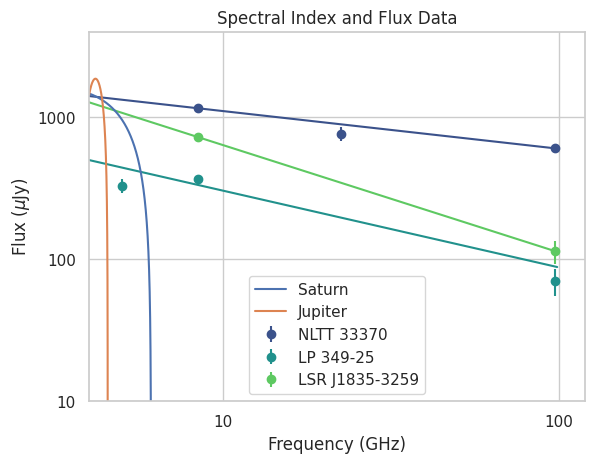

In [6]:
# Set the style and color palette from Seaborn
sns.set(style="whitegrid")
palette = sns.color_palette("viridis", n_colors=3)

# Plot data for NLTT 33370
plt.errorbar(nltt_33370_array[:, 0], nltt_33370_array[:, 1], yerr=nltt_33370_array[:, 2], fmt='o', label='NLTT 33370', color=palette[0])

# Plot data for LP 349-25
plt.errorbar(lp_349_25_ab_array[:, 0], lp_349_25_ab_array[:, 1], yerr=lp_349_25_ab_array[:, 2], fmt='o', label='LP 349-25', color=palette[1])

# Plot data for LSR J1835-3259
plt.errorbar(lsr_j1835_3259_array[:, 0], lsr_j1835_3259_array[:, 1], yerr=lsr_j1835_3259_array[:, 2], fmt='o', label='LSR J1835-3259', color=palette[2])

# Create x-values for spectral index curves
x_values = np.arange(0, 100, 1)

# Calculate spectral index curves
lp_spectral_index = spectral_index(x_values, lp_popt[0], lp_popt[1])
lsr_spectral_index = spectral_index(x_values, lsr_popt[0], lsr_popt[1])
nltt_spectral_index = spectral_index(x_values, nltt_popt[0], nltt_popt[1])

# Plot spectral index curves
plt.plot(x_values, lp_spectral_index, color=palette[1])
plt.plot(x_values, lsr_spectral_index, color=palette[2])
plt.plot(x_values, nltt_spectral_index, color=palette[0])

# Rescaling and plotting Saturn and Jupiter aurorae
plt.plot(x_sat*0.001, y_sat*2E21, label='Saturn')
plt.plot(x_jup*0.00033, y_jup*1.5E21, label='Jupiter')

# Set y-axis and x-axis scales to logarithmic
plt.yscale('log')
plt.xscale('log')

# Setting the x-lim
plt.xlim([1, 105])

# Set axis tick format to display normal numbers instead of scientific notation
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, pos: f"{x:.0f}"))
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, pos: f"{y:.0f}"))

# Set labels and legend
plt.xlabel('Frequency (GHz)')
plt.ylabel('Flux ($\mu$Jy)')
plt.legend()
plt.title('Spectral Index and Flux Data')

plt.ylim([10, 4000])
plt.xlim([4, 120])

# Show the plot
plt.show()

### Calculate the electron energy index

Following the work of Dulk (1985), the number distribution of electrons is given by:

$n(E) = (\delta - 1)E_0^{\delta - 1} N E^{-\delta}$,

where $\delta$ is the electron energy index, $E_0$ is the low-energy cutoff (set at a low value of 10 keV for mildly relativistic electrons, although electrons below 100 keV contribute very little to the total energy), and $N$ is the number of electrons per cm$^{-3}$. The electron energy index $\delta$ can be related to the spectral index $\alpha$ by:

$\alpha = 0.9\delta - 1.22$ 

(Dulk and Marsh, 1982), differing slightly from the relation for synchrotron radiation.


In [7]:
def calculate_eei(alpha):
    '''
    Function to calculate the electron energy index from the spectral index.
    '''
    return (alpha+1.22)/0.9

In [8]:
nltt_delta, lsr_delta, lp_delta = calculate_eei(nltt_alpha), calculate_eei(lsr_alpha), calculate_eei(lp_alpha)

### Computing the Stellar Luminosity

The Stefan-Boltzmann law for stellar luminosity is given by:

$L = 4\pi R^2 \sigma T^4$

where $L$ is the luminosity of the star, $R$ is the radius of the star, $\sigma$ is the Stefan-Boltzmann constant, and $T$ is the effective temperature of the star.


In [9]:
def stef_bolt(R_star, T_star):
    '''
    Stefan-Boltzmann law between stellar luminosity (W), radius (R_J), and temperature (K).
    Inputs radius and temperature and returns L_star/L_sol.
    '''
    sigma = 5.67E-8
    L_sol = 3.83E26
    return 4*np.pi*sigma*(R_star*7E7)**2*T_star**4*1/L_sol

### Calculate the electron number density of a buried dipole

proton to electron ratio in Solar events N_e/N_p ~ 10^3
To translate this particle number density into an outgoing particle flux, I mul-
tiply by the rate of energetic protons escaping reconnection events. Assuming the
rate is given by R = N_p+ v, where v is taken as the speed of a 10 MeV proton (4 ×
10 9 cm s −1 ), I find an outgoing proton flux of approximately <2 × 10 12 cm −2 s −1

I scale the outgoing rate
by ( R/r ) 2 , where R is the size of the emitting region and r is the semi-major axis.
This provides a high estimate of the outgoing proton flux


The gyrosynchrotron equations of Dulk and Marsh (1982), arranged by White et al. (1989), can be used to estimate the number density of trapped electrons. I assume a dipolar magnetic field that scales with radius as $B(r) \propto r^{-n}$ and a power-law distribution of electrons of energy $E_0$ varies radially with $N \propto N_0(E_0) \left( \frac{r}{r_0} \right)^{-m}$.

In the case of a "buried" dipole, where the size of the radio emitting source is smaller than the stellar radius, the number density of electrons is given by:

$$N = 10^5 \times \frac{m + n(-0.2 + 0.9\delta) - 3}{10^{2.02-0.44\delta + m(0.13-0.16\delta) + n(-0.35+0.02\delta) + mn(-0.08+0.06\delta)}} \left( \frac{S}{ \text{mJy}} \right)$$

$$\times \left( \frac{B}{\text{kG}} \right)^{0.2-0.9\delta} \left(\frac{R}{10^9 \text{cm}} \right)^{-3} \left( \frac{d}{pc} \right)^2 \left( \frac{\nu}{\text{GHz}} \right)^{-1.2+0.9\delta} \quad \text{cm}^{-3}$$

where:
- $\delta$ is the electron energy index,
- $n = 3$ in the case of a dipole,
- $m$ can take on values of 0, 2, or 3 depending on the pitch angle distribution.


The electron energies in gyrosynchrotron radiation range from around 10 keV to 100 MeV; however, I am only concerned with the most energetic electrons in the distribution, where $E \geq 10 \, \text{MeV}$.

By integrating the electron number distribution $N(E) \propto N_{\text{tot}} E^{-\delta}$ from $10 \, \text{MeV}$ to $\infty$ and normalizing to the total number of electrons $N_{\text{tot}}$ for an electron energy index $\delta = 2$, I find that only 0.001 of the gyrosynchrotron-emitting electrons have energies $\geq 10 \, \text{MeV}$.


In [10]:
def N_elec(S_uJy, delta, d_pc, v_GHz, m, n, B_kg, R_emit):
    '''
    Function to compute the electron number density in the emitting region of the star
    '''
    
    HE_frac = 0.001
    return HE_frac * 10**5 * 0.001*S_uJy/(10**(1.62 - 0.17*delta) 
    / (m + n*(-0.2 + 0.9*delta) - 3.0) * B_kG **(-0.2 + 0.9 *delta) * (7.2*R_emit) **3 * d_pc**-2. * v_GHz**(1.2 - 0.9*delta) )

### Estimating the proton flux incident on a surrounding planet

In the absence of detailed observations of UCD reconnection events, Solar reconnection events are used as a proxy to understand the relationship between the trapped electron population and outgoing energetic particles. Solar energetic particles (SEPs) are typically protons with energies ranging from $10 , \text{keV}$ to $10 , \text{GeV}$, which are accelerated during coronal mass ejections and solar flares and then released into the interplanetary medium. SEPs are classified as impulsive events (such as solar flares) and gradual events (such as coronal mass ejections). This analysis uses observations of solar flares as a proxy for small-scale reconnection events responsible for optically thin gyrosynchrotron radiation. Observations of impulsive solar flares show a ratio of energetic electrons to escaping protons ranging from $10^2$ to $10^4$.

If magnetic reconnection events on UCDs are similar to solar flares, a ratio of electrons to protons of around $10^3$ can be adopted. By estimating the rate of energetic protons escaping reconnection events and considering the speed of a $10 , \text{MeV}$ proton ($4 \times 10^9 , \text{cm s}^{-1}$), an outgoing proton flux of approximately $<2 \times 10^{12} , \text{cm}^{-2} \text{s}^{-1}$ can be found. This represents the instantaneous energetic particle flux at the site of the emitting region.

To estimate the particle flux arriving at a nearby planet, the distance dependence of the outgoing energetic particle flux must be considered. For example, in the case of the Sun, the proton flux can have a non-trivial radial profile that depends on the specific event and the orbital location of the detector. By scaling the outgoing rate with the square of the size of the emitting region and the semi-major axis, a high estimate of the outgoing proton flux can be obtained, taking into account factors such as helio longitudinal flux tubes and other space weather.

In [11]:
def proton_flux(N_e, a, v_cms=4E9, R_emit=0.05):
    """
    Function to calculate the proton flux incident on a surrounding planet.
    
    Parameters:
        N_e (float): The number density of electrons.
        a (float): The semi-major axis in au.
        v_cms (float, optional): The high-energy particle velocity in cm/s. 
            Default is 4E9 cm/s.
        R_emit (float, optional): The size of the emitting region in Jupiter Radii. 
            Default is 0.05.

    Returns:
        float: The calculated proton flux incident on a surrounding planet.
    """

    proton_flux_value = 10**-3 * N_e * v_cms * (R_emit / (a*2093))**2
    
    return proton_flux_value

### Defining the Habitable Zone

 The habitable zone is defined using the equilibrium temperature, calculated by equating the incoming stellar radiation on a planet with the outgoing radiation, assuming the planet radiates as a blackbody. The inner and outer habitable zone boundaries are based on the star's and solar's luminosity and other factors.
The inner and outer habitable zones are expressed as:

Inner habitable zone: $a_{\text{in}} = 0.75 , \text{au} \sqrt{\frac{L^*}{L}}$

Outer habitable zone: $a_{\text{out}} = 1.8 , \text{au} \sqrt{\frac{L^*}{L}}$

To estimate the proton flux on a hypothetical planet within the habitable zone, the median temperature required for liquid water is used as the planetary equilibrium temperature. The outgoing proton rate is calculated based on the velocity of a $10 , \text{MeV}$ proton, and scaled to account for protons arriving at the hypothetical planet. The result is expressed in proton flux units, taking into consideration the solid angle and the electron energy indices of the UCDs.

In [12]:
def calc_hz_lims(L_frac):
    '''Function to define the average of the inner and outer edges of the habitable zone.
    
    Parameters:
        L_frac (float): The ratio of Stellar to solar luminosity.

    Returns:
        tuple: the inner and outer limits of the habitable zone.    
    '''
    a_in = 0.75*np.sqrt(L_frac)
    a_out = 1.8*np.sqrt(L_frac)
    return a_in, a_out

### Loading UCD Properties Dataframe

In [13]:
UCD_dataframe = pd.read_csv("UCD_props.csv", index_col='Property')
UCD_dataframe

,NLTT 33370,LP 349-25 AB,LSR J1835+3259
Property,,,
spectral type,M7,M8,M8.5
mass (sol),0.179,0.12,0.05
mass uncertainty,0.055,0.008,0.0038
distance (pc),16.39,10.3,5.67
distance uncertainty,0.75,1.7,0.02
age (Myr),NaN,NaN,22
age uncertainty,NaN,NaN,4
Teff (K),3200,2800,2800
temp uncertainty,500,NaN,30


### Tying it all together

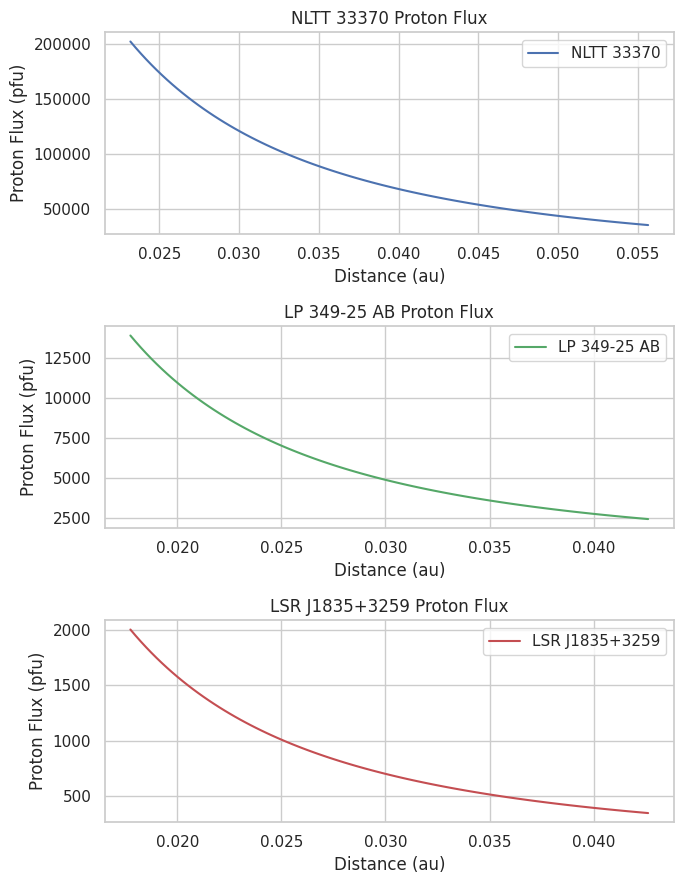

In [14]:
# Default values
m = 3
n = 3
B_kG = 0.6
R_emit = 0.05

# Delta
nltt_delta, lsr_delta, lp_delta = calculate_eei(nltt_alpha), calculate_eei(lsr_alpha), calculate_eei(lp_alpha)

# Electron number density
N_elec_nltt = N_elec(nltt_33370_array[0][1], nltt_delta, float(UCD_dataframe['NLTT 33370']['distance (pc)']), nltt_33370_array[0][0], m, n, B_kG, R_emit)
N_elec_lp = N_elec(lp_349_25_ab_array[0][1], lp_delta, float(UCD_dataframe['LP 349-25 AB']['distance (pc)']), lp_349_25_ab_array[0][0], m, n, B_kG, R_emit)
N_elec_lsr = N_elec(lsr_j1835_3259_array[0][1], lsr_delta, float(UCD_dataframe['LSR J1835+3259']['distance (pc)']), lsr_j1835_3259_array[0][0], m, n, B_kG, R_emit)

# Luminosity
L_nltt = stef_bolt(1, float(UCD_dataframe['NLTT 33370']['Teff (K)']))
L_lp = stef_bolt(1, float(UCD_dataframe['LP 349-25 AB']['Teff (K)']))
L_lsr = stef_bolt(1, float(UCD_dataframe['LSR J1835+3259']['Teff (K)']))

# Habitable Zone Range
hz_nltt = calc_hz_lims(L_nltt)
hz_lp = calc_hz_lims(L_lp)
hz_lsr = calc_hz_lims(L_lsr)

# Incident Proton Fluxes
nltt_a_vals = np.linspace(hz_nltt[0], hz_nltt[1], 100)
nltt_proton_flux = proton_flux(N_elec_nltt, nltt_a_vals, v_cms=4E9, R_emit=0.05)
lp_a_vals = np.linspace(hz_lp[0], hz_lp[1], 100)
lp_proton_flux = proton_flux(N_elec_lp, lp_a_vals, v_cms=4E9, R_emit=0.05)
lsr_a_vals = np.linspace(hz_lsr[0], hz_lsr[1], 100)
lsr_proton_flux = proton_flux(N_elec_lsr, lsr_a_vals, v_cms=4E9, R_emit=0.05)

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(7, 9))

# Plot NLTT 33370 data in the first subplot
axs[0].plot(nltt_a_vals, nltt_proton_flux, label='NLTT 33370', color='b')
axs[0].set_title('NLTT 33370 Proton Flux')
axs[0].set_xlabel('Distance (au)')
axs[0].set_ylabel('Proton Flux (pfu)')
axs[0].legend()

# Plot LP 349-25 AB data in the second subplot
axs[1].plot(lp_a_vals, lp_proton_flux, label='LP 349-25 AB', color='g')
axs[1].set_title('LP 349-25 AB Proton Flux')
axs[1].set_xlabel('Distance (au)')
axs[1].set_ylabel('Proton Flux (pfu)')
axs[1].legend()

# Plot LSR J1835+3259 data in the third subplot
axs[2].plot(lsr_a_vals, lsr_proton_flux, label='LSR J1835+3259', color='r')
axs[2].set_title('LSR J1835+3259 Proton Flux')
axs[2].set_xlabel('Distance (au)')
axs[2].set_ylabel('Proton Flux (pfu)')
axs[2].legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
